In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
print(tf.__version__)

2.6.0


In [2]:
from sklearn.datasets import make_circles

In [5]:
n_samples = 1000

X, y = make_circles(n_samples, noise = 0.03, random_state = 42)

In [6]:
X, X.shape, y, y.shape

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 (1000, 2),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 

In [6]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [7]:
circles = pd.DataFrame(
    {
        "X0": X[:, 0],
        "X1": X[:, 1],
        "label": y
    }
)
circles.shape

(1000, 3)

In [8]:
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [9]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

In [10]:
# y 변수를 살펴보니...
# 0과 1 밖에 없다 -> binary classification!
# 0, 1, 2, 3... -> multiclass classification!

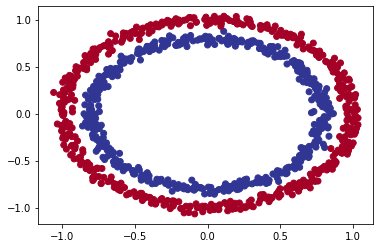

In [11]:
plt.scatter(X[:, 0], X[:, 1], c = y, cmap=plt.cm.RdYlBu)

In [12]:
X.shape, y.shape

((1000, 2), (1000,))

In [13]:
len(X), len(y)

(1000, 1000)

In [14]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [15]:
# 입력인 feature 2개가 출력 1개로 나온다!
# 우리가 만들 신경망은 tensorflow를 이용해서 만드는데...
# 입력으로는 2개 값을 가지는 1차원 텐서가 되어야하고, 출력으로는 1개 값을 가지는 텐서가 되어야 한다!

In [16]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["accuracy"]
)

model_1.fit(X, y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 858us/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4820


In [17]:
model_1.fit(X, y, epochs = 200, verbose = 0)

In [19]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 791us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [20]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["accuracy"]
)

model_2.fit(X, y, epochs = 100, verbose = 0)

In [21]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 394us/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314204216003, 0.5]

In [22]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

model_3.fit(X, y, epochs = 100, verbose = 0)

In [23]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 856us/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254650115967, 0.5080000162124634]

In [38]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1    

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 100),
    np.linspace(y_min, y_max, 100)
)

In [41]:
x_min, x_max

(-1.1595024599098636, 1.1337117525463374)

In [42]:
y_min, y_max

(-1.1677683182718437, 1.1360036756154805)

In [40]:
# linspace한 결과
e, yy.shape

((100, 100), (100, 100))

In [46]:
# Computer Vision할 때 flatting 
xx.ravel().shape, yy.ravel().shape

((10000,), (10000,))

In [47]:
x_in = np.c_[xx.ravel(), yy.ravel()]
type(x_in), x_in.shape

(numpy.ndarray, (10000, 2))

In [56]:
y_pred = model_3.predict(x_in)
y_pred, type(y_pred), y_pred.shape, len(y_pred[0])

(array([[0.5062948 ],
        [0.5051408 ],
        [0.50398684],
        ...,
        [0.5210973 ],
        [0.51994336],
        [0.5187894 ]], dtype=float32),
 numpy.ndarray,
 (10000, 1),
 1)

In [21]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )
    x_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(x_in)

    if len(y_pred[0]) > 1:
        print("multiclass 분류")
        y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
    else:
        print("binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


binary classification


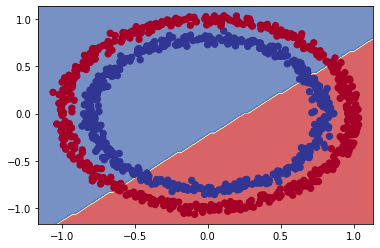

In [49]:
plot_decision_boundary(model_3, X, y)

In [58]:
tf.random.set_seed(42)

X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

model_3.fit(X_reg_train, y_reg_train, epochs = 100)

Epoch 1/100


ValueError: in user code:

    e:\20211027\workspace\lecture_night\venv_night\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    e:\20211027\workspace\lecture_night\venv_night\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    e:\20211027\workspace\lecture_night\venv_night\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    e:\20211027\workspace\lecture_night\venv_night\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    e:\20211027\workspace\lecture_night\venv_night\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    e:\20211027\workspace\lecture_night\venv_night\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    e:\20211027\workspace\lecture_night\venv_night\lib\site-packages\keras\engine\training.py:787 train_step
        y_pred = self(x, training=True)
    e:\20211027\workspace\lecture_night\venv_night\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    e:\20211027\workspace\lecture_night\venv_night\lib\site-packages\keras\engine\input_spec.py:250 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_2 is incompatible with the layer: expected axis -1 of input shape to have value 2 but received input with shape (None, 1)


In [59]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [60]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss = tf.keras.losses.mae, # 우리가 regressiong을 하겠다
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

model_3.fit(X_reg_train, y_reg_train, epochs = 100)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 997us/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 747us/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 1ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 747us/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 43.6830 - mae: 43.6830
Epoch 10/100
5/5 [==============================] - 0s 748us/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [=============================

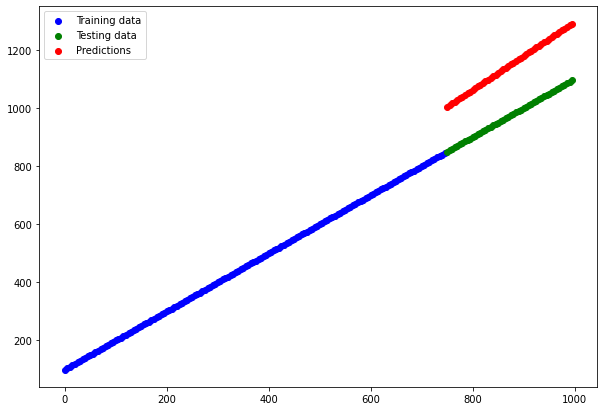

In [61]:
y_reg_preds = model_3.predict(y_reg_test)

plt.figure(figsize = (10, 7))
plt.scatter(X_reg_train, y_reg_train, c = "b", label = "Training data")
plt.scatter(X_reg_test, y_reg_test, c = "g", label = "Testing data")
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c = "r", label = "Predictions")
plt.legend()

In [70]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.linear),
    tf.keras.layers.Dense(1)
])

model_4.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ["accuracy"]
)

model_4.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 481us/step - loss: 4.2380 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 535us/step - loss: 4.0223 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 973us/step - loss: 3.8296 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 762us/step - loss: 3.7654 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 996us/step - loss: 3.6464 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.4960 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 818us/step - loss: 3.3803 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.2273 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 804us/step - loss: 2.8035 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 699us/step - loss: 2.5701 - accuracy: 

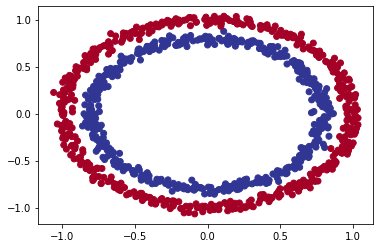

In [71]:
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)

binary classification


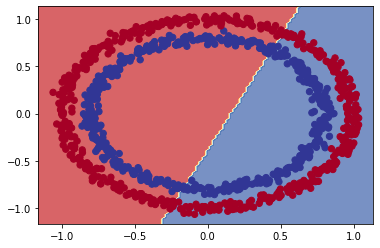

In [72]:
plot_decision_boundary(model_4, X, y)

In [73]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

model_5.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ["accuracy"]
)

history = model_5.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 752us/step - loss: 1.8377 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 904us/step - loss: 1.4449 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 755us/step - loss: 1.3410 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2678 - accuracy: 0.4770
Epoch 5/100
32/32 [==============================] - 0s 874us/step - loss: 1.2116 - accuracy: 0.4390
Epoch 6/100
32/32 [==============================] - 0s 757us/step - loss: 1.1664 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 910us/step - loss: 1.1294 - accuracy: 0.4250
Epoch 8/100
32/32 [==============================] - 0s 695us/step - loss: 1.0970 - accuracy: 0.4420
Epoch 9/100
32/32 [==============================] - 0s 959us/step - loss: 1.0670 - accuracy: 0.4540
Epoch 10/100
32/32 [==============================] - 0s 829us/step - loss: 1.0407 - accuracy

In [74]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

model_6.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ["accuracy"]
)

history = model_6.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 886us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 872us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 884us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 588us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 551us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 941us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 811us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 792us/step - loss: 7.7125 - accuracy: 

In [75]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 568us/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

binary classification


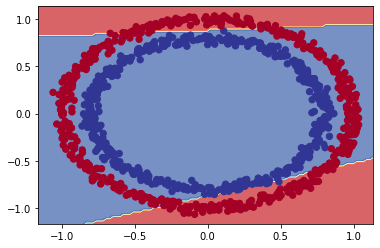

In [76]:
plot_decision_boundary(model_6, X, y)

In [77]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)
])

model_7.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ["accuracy"]
)

history = model_7.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 6s 918us/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 692us/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch

binary classification


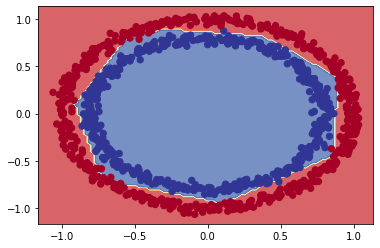

In [78]:
plot_decision_boundary(model_7, X, y)

In [83]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

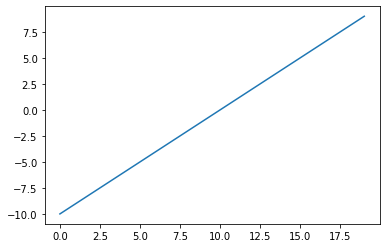

In [84]:
plt.plot(A)

In [85]:
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

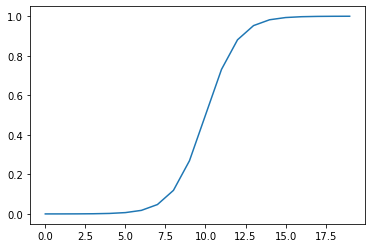

In [86]:
plt.plot(sigmoid(A))

In [87]:
def relu(x):
    return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

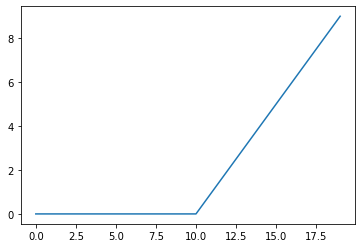

In [88]:
plt.plot(relu(A))

In [89]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [90]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

In [91]:
len(X)

1000

In [9]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape

((800, 2), (200, 2))

In [106]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_8.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),  # model_7 (learning_rate : 0.001) => model_8 (learning_rate : 0.01) 빨리 학습해라!
    metrics = ["accuracy"]
)

history = model_8.fit(X_train, y_train, epochs = 25)

Epoch 1/25
25/25 [==============================] - 5s 645us/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 415us/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 415us/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 977us/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 839us/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 950us/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 960us/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 461us/step - loss: 0.5714 - accuracy: 0.7738
Epo

In [102]:
loss, accuracy = model_8.evaluate(X_test, y_test)
loss, accuracy

7/7 [==============================] - 0s 935us/step - loss: 0.0364 - accuracy: 0.9850


(0.03643230348825455, 0.9850000143051147)

In [104]:
# learning_rate 를 10배ㅏ 높였습니다.
# learning_rate가 클수록 배우고자하는 능력 더 빨라집니다. => 벼락치기 공부! 

binary classification
binary classification


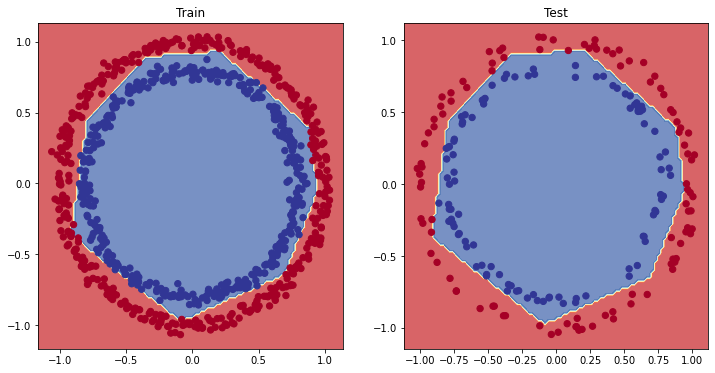

In [107]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)

In [108]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


Text(0.5, 1.0, 'Model_8 traning curves')

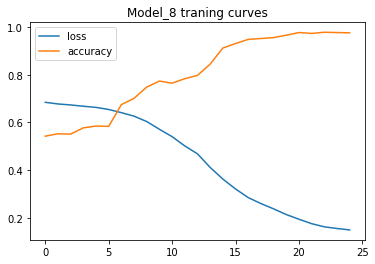

In [109]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 traning curves")

In [110]:
# 모델을 이루는 레이어 갯수, 레이어를 이루는 뉴런의 갯수, activation, loss, optimization 함수
# 이제 learning_rate를 0.01하거나 다른 값으로 바꾸는 정확한 근거를 우리는 말하고자 합니다.

In [116]:
for i in range(100):
    print(1e-4 * 10 ** (i /20))

0.0001
0.00011220184543019634
0.00012589254117941674
0.00014125375446227543
0.00015848931924611136
0.0001778279410038923
0.00019952623149688796
0.00022387211385683394
0.000251188643150958
0.0002818382931264454
0.000316227766016838
0.00035481338923357554
0.00039810717055349724
0.0004466835921509632
0.0005011872336272722
0.0005623413251903491
0.0006309573444801934
0.0007079457843841379
0.0007943282347242816
0.0008912509381337455
0.001
0.0011220184543019637
0.0012589254117941675
0.0014125375446227542
0.0015848931924611134
0.001778279410038923
0.00199526231496888
0.0022387211385683403
0.0025118864315095794
0.0028183829312644535
0.0031622776601683794
0.003548133892335755
0.003981071705534973
0.0044668359215096305
0.005011872336272723
0.005623413251903491
0.006309573444801933
0.007079457843841381
0.007943282347242814
0.008912509381337455
0.01
0.01122018454301963
0.012589254117941677
0.01412537544622754
0.01584893192461114
0.01778279410038923
0.01995262314968879
0.022387211385683402
0.0251188

In [114]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_9.compile(
    loss = "binary_crossentropy",
    optimizer = "Adam",
    metrics = ["accuracy"]
)

learnin_rate_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10 ** (epoch /20)
)

history = model_9.fit(X_train, y_train, epochs = 100, callbacks = [learnin_rate_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 940us/step - loss: 0.6945 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 606us/step - loss: 0.6938 - accuracy: 0.4975
Epoch 3/100
25/25 [==============================] - 0s 777us/step - loss: 0.6930 - accuracy: 0.4963
Epoch 4/100
25/25 [==============================] - 0s 870us/step - loss: 0.6922 - accuracy: 0.4975
Epoch 5/100
25/25 [==============================] - 0s 970us/step - loss: 0.6914 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 822us/step - loss: 0.6906 - accuracy: 0.5013
Epoch 7/100
25/25 [==============================] - 0s 997us/step - loss: 0.6898 - accuracy: 0.4950
Epoch 8/100
25/25 [==============================] - 0s 711us/step - loss: 0.6889 - accuracy: 0.5038
Epoch 9/100
25/25 [==============================] - 0s 756us/step - loss: 0.6880 - accuracy: 0.5013
Epoch 10/100
25/25 [==============================] - 0s 802us/step - loss: 0.6871 - accura

<AxesSubplot:xlabel='epochs'>

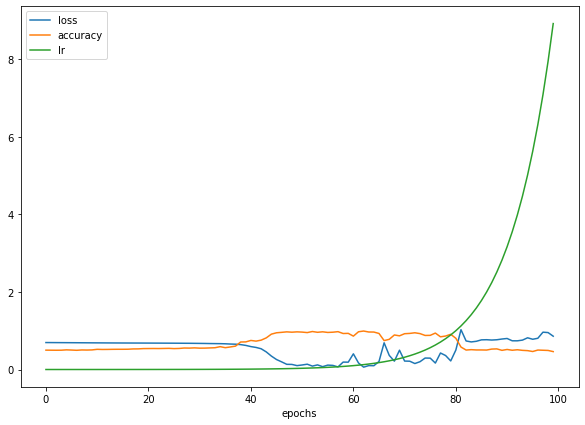

In [115]:
pd.DataFrame(history.history).plot(figsize = (10, 7), xlabel = "epochs")

Text(0.5, 1.0, 'Learning rate vs. loss')

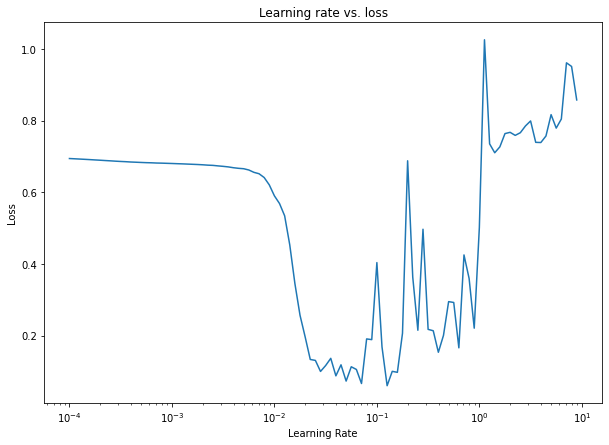

In [118]:
lrs = 1e-4 * 10 ** (np.arange(100) /20)
plt.figure(figsize = (10, 7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss")

In [119]:
10**0, 10**-1, 10**-2, 10**-3, 10**-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [10]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_10.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics = ["accuracy"]
)

history = model_10.fit(X_train, y_train, epochs = 20)

Epoch 1/20
25/25 [==============================] - 2s 4ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [

In [11]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 831us/step - loss: 0.0574 - accuracy: 0.9900


[0.057401858270168304, 0.9900000095367432]

NameError: name 'plot_decision_boundary' is not defined

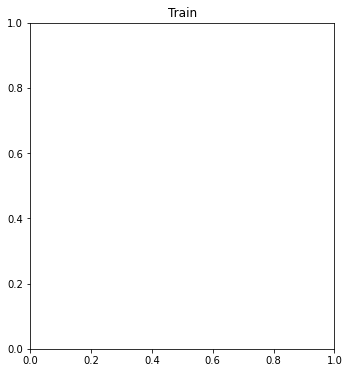

In [12]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)

In [125]:
# 주요 metric들

# Accuracy : 100%를 기준으로 해서 얼마나 잘 맞는지 단위가 %
# Precision : 전체 sample에서 실제 possitive갯수와의 비율 : 0 ~ 1
# Recall : true positive와 false negative와 총 합과 true positive와의 비율
# F1-Score : precision + recall => 1이 가장 좋고, 0이 가장 나쁘다
# Confusion Matrix : 
# Classification report : precision, recall, F1-score와 같은 주요 classification metric들의 모음들

In [13]:
loss, accuracy = model_10.evaluate(X_test, y_test)
loss, accuracy

7/7 [==============================] - 0s 1ms/step - loss: 0.0574 - accuracy: 0.9900


(0.057401858270168304, 0.9900000095367432)

In [15]:
from sklearn.metrics import confusion_matrix

y_preds = model_10.predict(X_test)

In [16]:
confusion_matrix(y_test, y_preds)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [19]:
y_preds[:10]

array([[9.8526537e-01],
       [9.9923801e-01],
       [9.9032342e-01],
       [9.9706948e-01],
       [3.9622903e-01],
       [1.8126875e-02],
       [9.6829069e-01],
       [1.9746810e-02],
       [9.9967158e-01],
       [5.6457520e-04]], dtype=float32)

In [20]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [22]:
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [23]:
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]], dtype=int64)

In [30]:
confusion_matrix(y_test, tf.round(y_preds)).astype("float").dtype

dtype('float64')

In [24]:
type(y_test), type(tf.round(y_preds))

(numpy.ndarray, tensorflow.python.framework.ops.EagerTensor)

In [25]:
y_test.dtype, tf.round(y_preds).dtype

(dtype('int64'), tf.float32)

In [37]:
figsize = (10, 10)

cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis]
n_classes = cm.shape[0]

In [38]:
cm_norm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis]
cm_norm

array([[0.98019802, 0.01980198],
       [0.        , 1.        ]])

In [39]:
cm.shape

(2, 2)

In [40]:
n_classes = cm.shape[0]
n_classes

2

In [44]:
import itertools

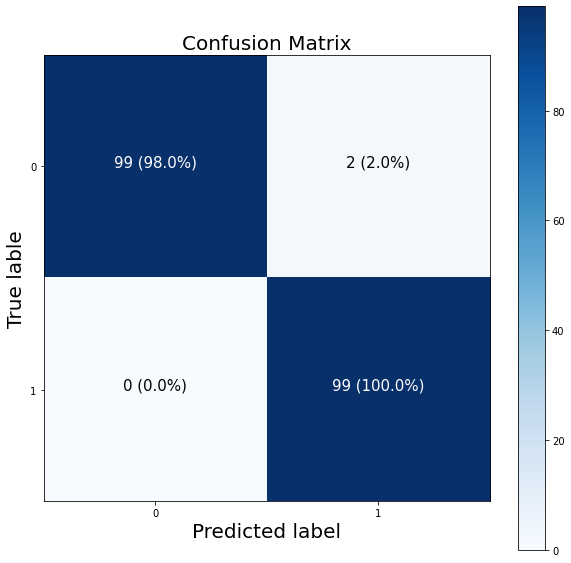

In [45]:
fig, ax = plt.subplots(figsize = figsize)
cax = ax.matshow(cm, cmap = plt.cm.Blues)
fig.colorbar(cax)

classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

ax.set(
    title = "Confusion Matrix",
    xlabel = "Predicted label",
    ylabel = "True lable",
    xticks = np.arange(n_classes),
    yticks = np.arange(n_classes),
    xticklabels = labels,
    yticklabels = labels
)

ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

threshold = (cm.max() + cm.min()) / 2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)", 
    horizontalalignment = "center", color = "white" if cm[i, j] > threshold else "black", size = 15)

In [46]:
import itertools

In [48]:
# for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
for i, j in itertools.product(range(0, 3), range(0, 3)):
    print(i, j)

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2


In [51]:
for i, j in itertools.product(range(2, 10), range(1, 10)):
    # print(i, j)
    print(f"{i} * {j} = { i * j }")

2 * 1 = 2
2 * 2 = 4
2 * 3 = 6
2 * 4 = 8
2 * 5 = 10
2 * 6 = 12
2 * 7 = 14
2 * 8 = 16
2 * 9 = 18
3 * 1 = 3
3 * 2 = 6
3 * 3 = 9
3 * 4 = 12
3 * 5 = 15
3 * 6 = 18
3 * 7 = 21
3 * 8 = 24
3 * 9 = 27
4 * 1 = 4
4 * 2 = 8
4 * 3 = 12
4 * 4 = 16
4 * 5 = 20
4 * 6 = 24
4 * 7 = 28
4 * 8 = 32
4 * 9 = 36
5 * 1 = 5
5 * 2 = 10
5 * 3 = 15
5 * 4 = 20
5 * 5 = 25
5 * 6 = 30
5 * 7 = 35
5 * 8 = 40
5 * 9 = 45
6 * 1 = 6
6 * 2 = 12
6 * 3 = 18
6 * 4 = 24
6 * 5 = 30
6 * 6 = 36
6 * 7 = 42
6 * 8 = 48
6 * 9 = 54
7 * 1 = 7
7 * 2 = 14
7 * 3 = 21
7 * 4 = 28
7 * 5 = 35
7 * 6 = 42
7 * 7 = 49
7 * 8 = 56
7 * 9 = 63
8 * 1 = 8
8 * 2 = 16
8 * 3 = 24
8 * 4 = 32
8 * 5 = 40
8 * 6 = 48
8 * 7 = 56
8 * 8 = 64
8 * 9 = 72
9 * 1 = 9
9 * 2 = 18
9 * 3 = 27
9 * 4 = 36
9 * 5 = 45
9 * 6 = 54
9 * 7 = 63
9 * 8 = 72
9 * 9 = 81


In [52]:
# binary classification
# multiclass classification

# MNIST (0 ~ 9)
# CIFAR-10 (자동차 모델)
# Fashion-MNIST (옷 종류)
# CoCo dataset 

In [53]:
# 왜 Fashion-MNIST 가지고 multiclass classification을 하느냐...
# 편해서... 왜 편하냐 -> tensorflow에서 기본으로 제공하는 데이터셋입니다.

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [55]:
from tensorflow.keras.datasets import fashion_mnist

In [87]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [88]:
train_data.shape, type(train_data), train_labels.shape, type(train_labels)

((60000, 28, 28), numpy.ndarray, (60000,), numpy.ndarray)

In [58]:
print(train_data[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [59]:
train_data[0].shape, type(train_data[0])

((28, 28), numpy.ndarray)

In [62]:
print(train_labels[0])

9


In [60]:
train_labels[0].shape, type(train_labels[0])

((), numpy.uint8)

In [63]:
test_data.shape, test_labels.shape

((10000, 28, 28), (10000,))

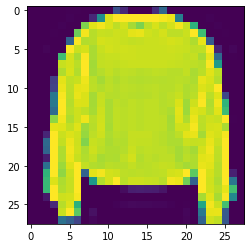

In [64]:
plt.imshow(train_data[7])

In [65]:
train_labels[7]

2

In [67]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

In [68]:
class_names[2]

'Pullover'

Text(0.5, 1.0, 'T-shirt/top')

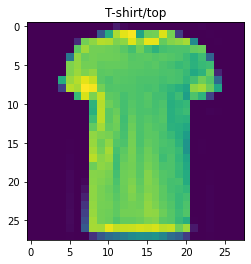

In [69]:
plt.imshow(train_data[17])
plt.title(class_names[train_labels[17]])

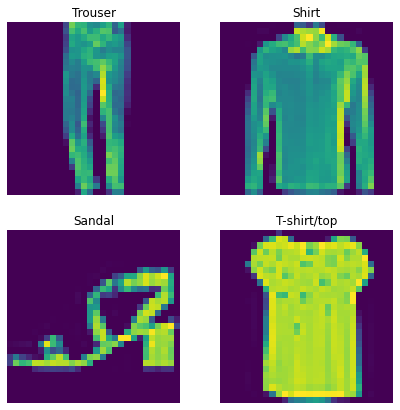

In [77]:
import random

plt.figure(figsize = (7, 7))

for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index])
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

In [78]:
# 입력의 모양 : 28 pixels x 28 pixels
# 출력의 모양 : 10개중에 하나
# activation function, loss function도 교체 
# dataset => training, validate, test 3가지 형태 

In [80]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), # 28 x 28 = 784개의 벡터 형태로 바꾸어 준다
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax"),
])

model_11.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

non_norm_history = model_11.fit(
    train_data,
    train_labels,
    epochs = 10,
    validation_data = (test_data, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 2.1641 - accuracy: 0.1614 - val_loss: 1.7904 - val_accuracy: 0.2057
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.7082 - accuracy: 0.2508 - val_loss: 1.6529 - val_accuracy: 0.3032
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6356 - accuracy: 0.2873 - val_loss: 1.6381 - val_accuracy: 0.2845
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6063 - accuracy: 0.3011 - val_loss: 1.5996 - val_accuracy: 0.3098
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5919 - accuracy: 0.3132 - val_loss: 1.5742 - val_accuracy: 0.3316
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5837 - accuracy: 0.3140 - val_loss: 1.5633 - val_accuracy: 0.3113
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5805 - accuracy: 0.3188 - val_loss: 1.5622 - val_accuracy:

In [81]:
model_11.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 3140      
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [89]:
train_data.min(), train_data.max()

(0, 255)

In [90]:
# 0 ~ 255 -> 0 ~ 1 (scaling or normalization)

train_data = train_data / 255.0
test_data = test_data / 255.0

train_data.min(), train_data.max()

(0.0, 1.0)

In [91]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), # 28 x 28 = 784개의 벡터 형태로 바꾸어 준다
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax"),
])

model_12.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

norm_history = model_12.fit(
    train_data,
    train_labels,
    epochs = 10,
    validation_data = (test_data, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

<AxesSubplot:title={'center':'Normalized Data'}>

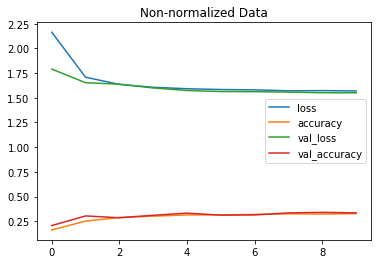

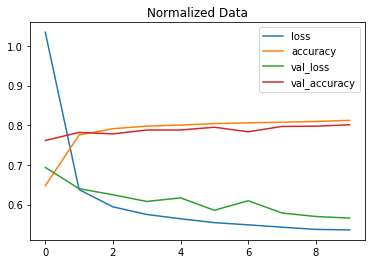

In [92]:
pd.DataFrame(non_norm_history.history).plot(title = "Non-normalized Data")
pd.DataFrame(norm_history.history).plot(title = "Normalized Data")

In [96]:
for i in range(0, 40):
    print(1e-3 * 10**(i/20))

0.001
0.0011220184543019635
0.0012589254117941673
0.0014125375446227544
0.0015848931924611136
0.0017782794100389228
0.0019952623149688794
0.0022387211385683395
0.0025118864315095803
0.002818382931264454
0.0031622776601683794
0.003548133892335755
0.0039810717055349725
0.004466835921509632
0.005011872336272722
0.005623413251903491
0.006309573444801934
0.007079457843841379
0.007943282347242816
0.008912509381337454
0.01
0.011220184543019636
0.012589254117941675
0.01412537544622754
0.015848931924611134
0.01778279410038923
0.0199526231496888
0.022387211385683402
0.025118864315095794
0.028183829312644536
0.03162277660168379
0.03548133892335755
0.039810717055349734
0.04466835921509631
0.05011872336272723
0.05623413251903491
0.06309573444801933
0.07079457843841382
0.07943282347242814
0.08912509381337455


In [98]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), # 28 x 28 = 784개의 벡터 형태로 바꾸어 준다
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax"),
])

model_13.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_13.fit(
    train_data,
    train_labels,
    epochs = 40,
    validation_data = (test_data, test_labels),
    callbacks = [lr_scheduler]
)

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

Text(0.5, 1.0, 'Finding the ideal learning rate')

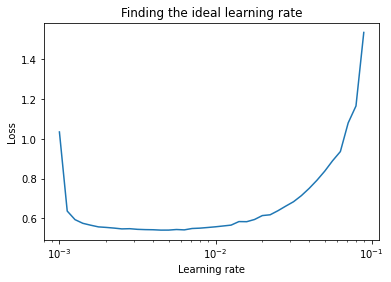

In [101]:
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [106]:
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), # 28 x 28 = 784개의 벡터 형태로 바꾸어 준다
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax"),
])

model_14.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.002),
    metrics = ["accuracy"]
)

history = model_14.fit(
    train_data,
    train_labels,
    epochs = 20,
    validation_data = (test_data, test_labels),
)

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 1.0286 - accuracy: 0.6631 - val_loss: 0.7823 - val_accuracy: 0.7399
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7339 - accuracy: 0.7486 - val_loss: 0.7267 - val_accuracy: 0.7541
Epoch 3/20
1545/1875 [=======================>......] - ETA: 0s - loss: 0.6801 - accuracy: 0.7617

KeyboardInterrupt: 